# Importing required libraries

In [ ]:
!pip install qiskit qiskit-algorithms qiskit-machine-learning qiskit-terra pylatexenc

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

# Generating synthetic 2D data

In [3]:
X, y  = make_blobs(
    n_samples=200,
    centers=2,
    center_box=(-1, 1),
    cluster_std=0.1,
    random_state=123,
)

#  Creating Traditional Support Vector Machine (SVM)

Traditional Support Vector Machine Score: 1.0


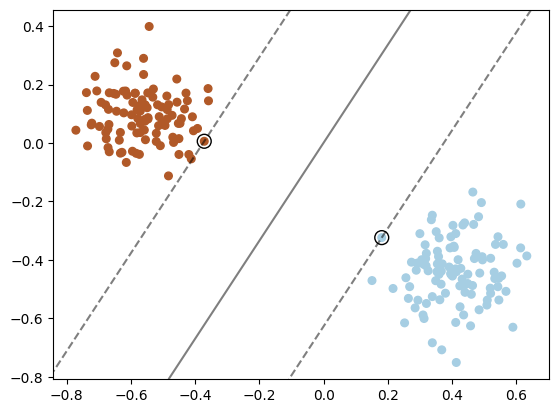

In [4]:
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)
score = clf.score(X, y)

# Print the accuracy score
print("Traditional Support Vector Machine Score:", score)
# Display the data and the classification with the model
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# Plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Predictions: [0 1 0 0]


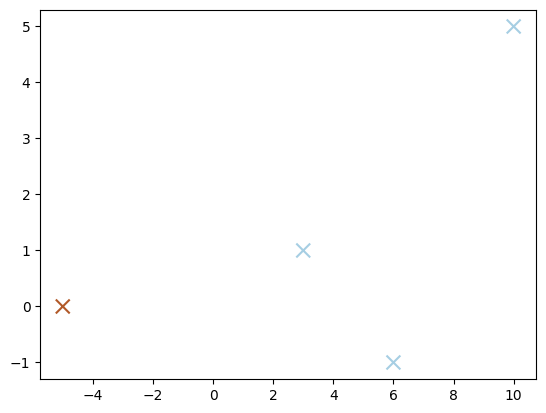

In [5]:
# New data points for which we want to predict the class
new_data = np.array([[10, 5], [-5, 0], [3, 1], [6, -1]])

# Use the trained classifier to make predictions
predictions = clf.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

# Optionally, plot these points on the existing plot
plt.scatter(new_data[:, 0], new_data[:, 1], c=predictions, s=100, cmap=plt.cm.Paired, marker='x')
plt.show()

#  Creating Quantum Computer Support Vector Machine (SVM) using qiskit

In [6]:
from qiskit import IBMQ, Aer
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit.algorithms.state_fidelities import ComputeUncompute
from qiskit.primitives import Sampler
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.algorithms import QSVC
import matplotlib.pyplot as plt

<ipython-input-6-51d258501bb4>:3: DeprecationWarning: ``qiskit.algorithms`` has been migrated to an independent package: https://github.com/qiskit-community/qiskit-algorithms. The ``qiskit.algorithms`` import path is deprecated as of qiskit-terra 0.25.0 and will be removed no earlier than 3 months after the release date. Please run ``pip install qiskit_algorithms`` and use ``import qiskit_algorithms`` instead.
  from qiskit.algorithms.state_fidelities import ComputeUncompute


In [7]:
# Create a Sampler instance with the chosen backend
sampler = Sampler()


# Create a fidelity instance with the Sampler
fidelity = ComputeUncompute(sampler=sampler)

# Create the feature map and quantum kernel
feature_map = ZZFeatureMap(2)
new_kernel = FidelityQuantumKernel(feature_map=feature_map, fidelity=fidelity)

# Create and fit the QSVC
qsvc = QSVC(quantum_kernel=new_kernel)
qsvc.fit(X, y)
print("Quantum Computer Support Vector Machine Score:", qsvc.score(X, y))


Quantum Computer Support Vector Machine Score: 0.995


Predictions: [1 0 1 0]


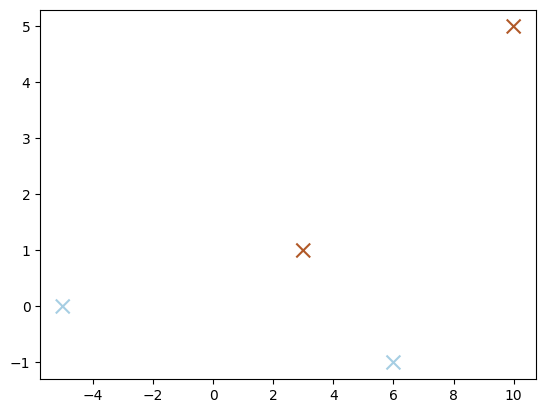

In [8]:
# New data points for which we want to predict the class
new_data = np.array([[10, 5], [-5, 0], [3, 1], [6, -1]])

# Use the trained classifier to make predictions
predictions = qsvc.predict(new_data)

# Print the predictions
print("Predictions:", predictions)

# Optionally, plot these points on the existing plot
plt.scatter(new_data[:, 0], new_data[:, 1], c=predictions, s=100, cmap=plt.cm.Paired, marker='x')
plt.show()

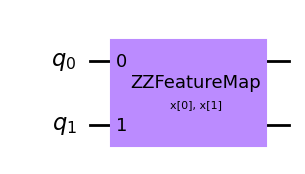

In [9]:
# Draw the circuit
%matplotlib inline
feature_map.draw(output='mpl', style='clifford')
